# Import required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Import Dataset

In [2]:
dataset = pd.read_csv('Zomato_data.csv')
dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1/5,775,800,Buffet
1,Spice Elephant,Yes,No,4.1/5,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8/5,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7/5,88,300,Buffet
4,Grand Village,No,No,3.8/5,166,600,Buffet


# Checing the information about the dataset

In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148 entries, 0 to 147
Data columns (total 7 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   name                         148 non-null    object
 1   online_order                 148 non-null    object
 2   book_table                   148 non-null    object
 3   rate                         148 non-null    object
 4   votes                        148 non-null    int64 
 5   approx_cost(for two people)  148 non-null    int64 
 6   listed_in(type)              148 non-null    object
dtypes: int64(2), object(5)
memory usage: 8.2+ KB


# Checking the null values in the dataset

In [4]:
dataset.isnull().sum()

name                           0
online_order                   0
book_table                     0
rate                           0
votes                          0
approx_cost(for two people)    0
listed_in(type)                0
dtype: int64

# Showing the descriptive statistics of the dataset

In [5]:
dataset.describe()

,votes,approx_cost(for two people)
count,148.000000,148.000000
mean,264.810811,418.243243
std,653.676951,223.085098
min,0.000000,100.000000
25%,6.750000,200.000000
50%,43.500000,400.000000
75%,221.750000,600.000000
max,4884.000000,950.000000


# Checking the rows and columns present in the dataset

In [6]:
dataset.shape

(148, 7)

# Changing the data-type of rate column

In [7]:
def handlerate(value):
    value = str(value).split('/')
    value = value[0];
    return float(value)

In [8]:
dataset['rate'] = dataset['rate'].apply(handlerate)
dataset.head()

,name,online_order,book_table,rate,votes,approx_cost(for two people),listed_in(type)
0,Jalsa,Yes,Yes,4.1,775,800,Buffet
1,Spice Elephant,Yes,No,4.1,787,800,Buffet
2,San Churro Cafe,Yes,No,3.8,918,800,Buffet
3,Addhuri Udupi Bhojana,No,No,3.7,88,300,Buffet
4,Grand Village,No,No,3.8,166,600,Buffet


# Queries related to the project 

# 1. What type of resturant do the majority of customers order from?

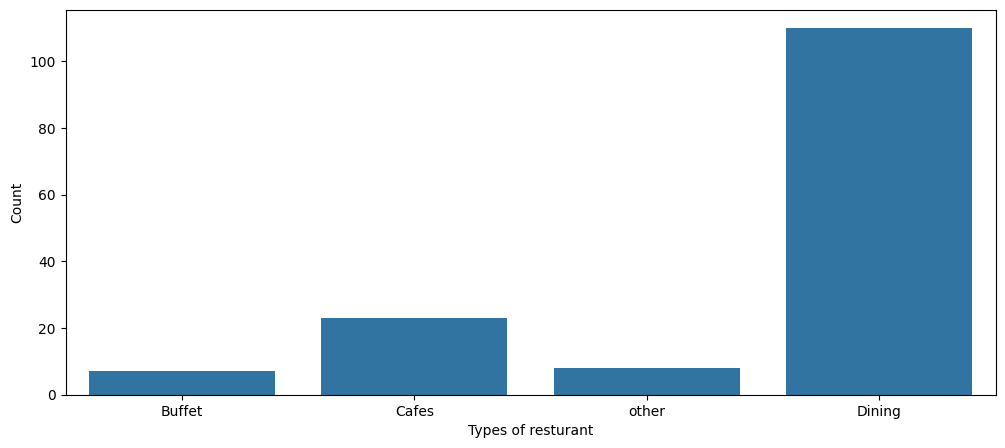

In [27]:
plt.figure(figsize = (12,5))
sns.countplot(x = dataset['listed_in(type)'], )
plt.xlabel('Types of resturant')
plt.ylabel('Count')
plt.show()

# 2. How many votes has each type of restaurant received from customers? 

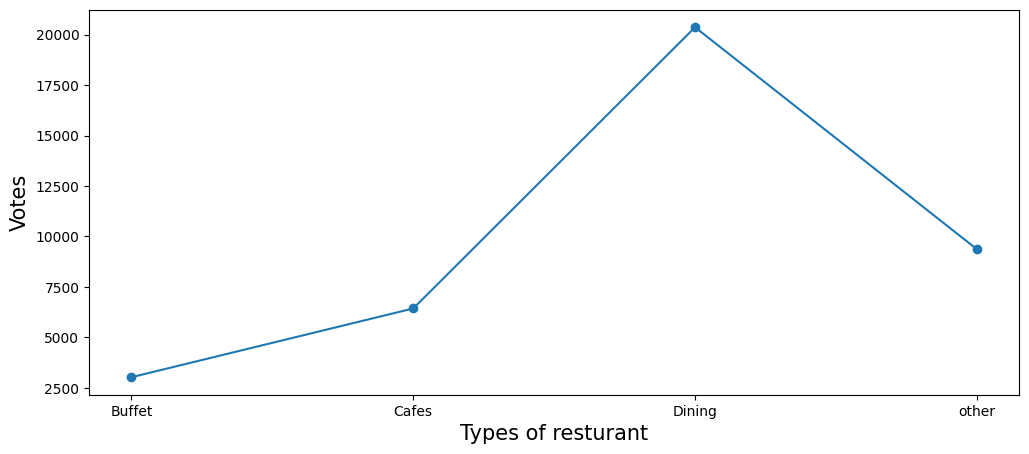

In [29]:
plt.figure(figsize = (12,5))
grouped_data = dataset.groupby('listed_in(type)')['votes'].sum()
result = pd.DataFrame({'votes' : grouped_data})
plt.plot(result, marker = "o")
plt.xlabel("Types of resturant", size = 15)
plt.ylabel("Votes", size = 15)
plt.show()

# 3. What are the rating that the majority of restaurants have recieved?

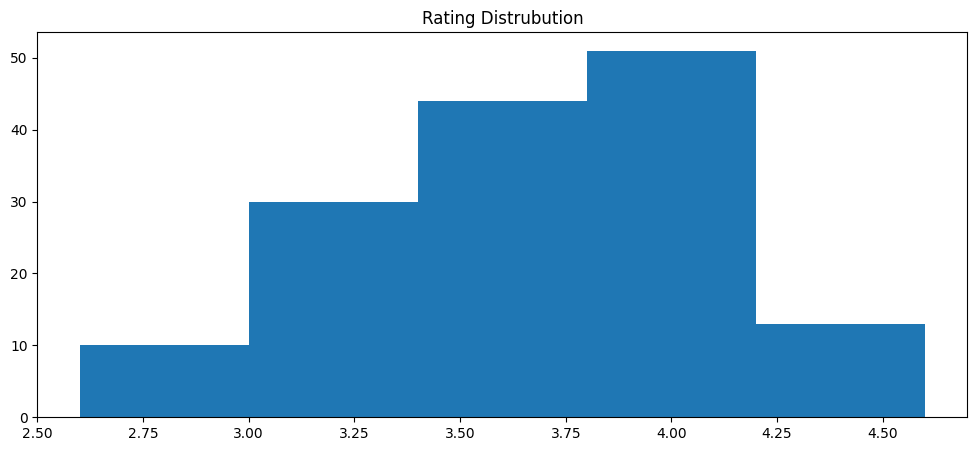

In [16]:
plt.figure(figsize = (12,5))
plt.hist(dataset['rate'],bins = 5)
plt.title('Rating Distrubution')
plt.show()

# 4. Zomato had observed that most couples order most of their food online. What is the average spending on each order?

In [23]:
data = pd.DataFrame(dataset['approx_cost(for two people)'].value_counts())
data

,count
approx_cost(for two people),
300,23
200,16
150,16
400,15
500,14
600,13
800,12
100,6
450,6


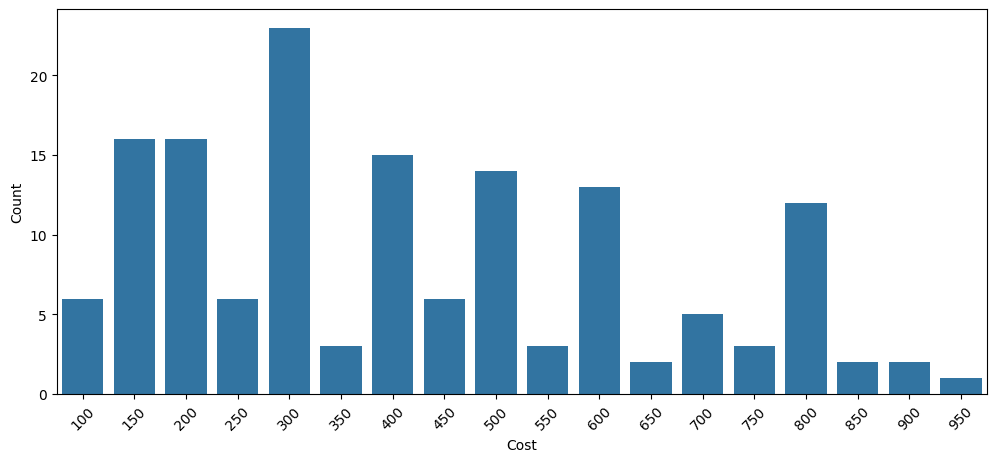

In [41]:
couple_cost = dataset['approx_cost(for two people)']
plt.figure(figsize = (12,5))
sns.countplot(x = couple_cost)
plt.xticks(rotation = 45)
plt.xlabel('Cost')
plt.ylabel('Count')
plt.show()

# 5. Which mode(offline or online) has recieved the maximum rating?

In [31]:
dataset['online_order'].value_counts()

online_order
No     90
Yes    58
Name: count, dtype: int64

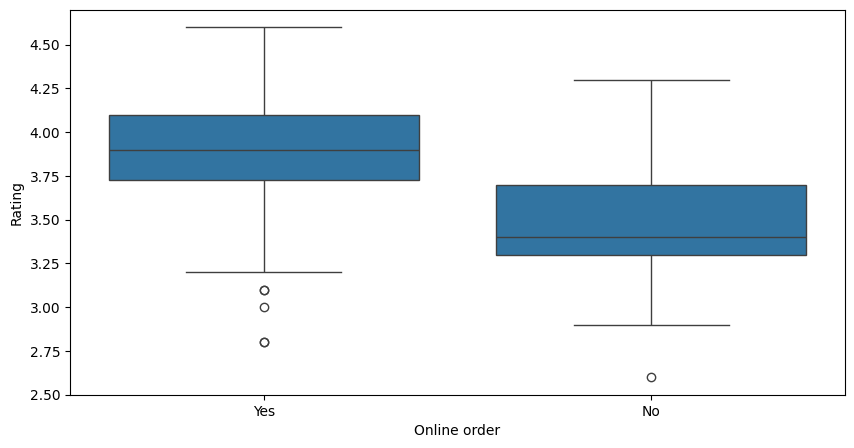

In [34]:
plt.figure(figsize = (10,5))
sns.boxplot(x = 'online_order', y = 'rate', data = dataset)
plt.xlabel('Online order')
plt.ylabel('Rating')
plt.show()

# 6. Which type of restaurant received more offine orders so that Zomato can pick customers with some good offers?

In [37]:
data = pd.DataFrame(dataset['listed_in(type)'].value_counts())
data

,count
listed_in(type),
Dining,110
Cafes,23
other,8
Buffet,7


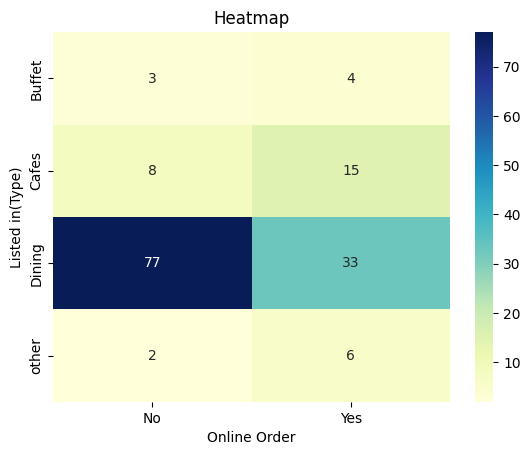

In [39]:
pivot_table = dataset.pivot_table(index = 'listed_in(type)',columns = 'online_order', aggfunc = 'size', fill_value = 0)
sns.heatmap(pivot_table, annot = True, cmap = 'YlGnBu', fmt = 'd')
plt.title('Heatmap')
plt.xlabel('Online Order')
plt.ylabel('Listed in(Type)')
plt.show()

# Conclusion

1. The majority of customers prefer ordering from specific types of restaurants, possibly casual dining or quick-service restaurants.

2. The number of votes received varies across restaurant types, indicating customer engagement and preference.

3. Most restaurants receive mid-range ratings, suggesting areas for improvement in service quality or food standards.

4. Couples tend to spend a significant amount per order when ordering online, reinforcing Zomato’s observation.

5. One mode (either online or offline) stands out in terms of ratings, showing customer preference and satisfaction.

6. Some restaurant types receive more offline orders, presenting an opportunity for Zomato to introduce targeted offers to attract more customers.